Imports

In [2]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import scipy
import gmatch4py as gm

<frozen importlib._bootstrap>:241: UserWarning: To obtain optimal results install the Cython 'munkres' module at  https://github.com/jfrelinger/cython-munkres-wrapper


## Load Dataset

30


<AxesSubplot: >

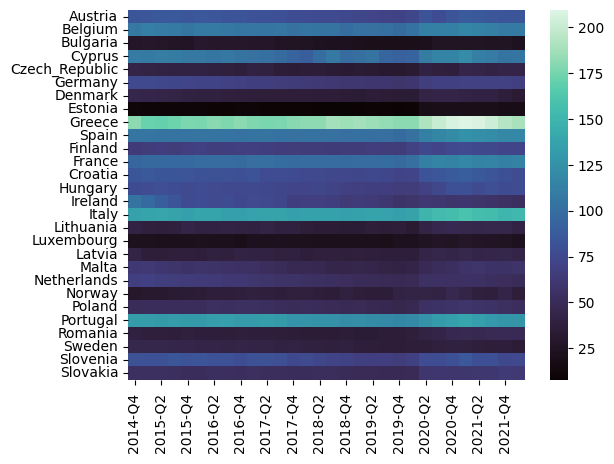

In [3]:

df = pd.read_csv("dataset.tsv", sep="\t")
countries = df.iloc[:,0]
df = df.iloc[:,1:]
print(len(df.columns))
# df=(df-df.mean())/df.std() #normalization
sns.heatmap(df, yticklabels=countries, cmap=sns.color_palette("mako", as_cmap=True))

In [4]:
# df = pd.read_csv("dataset2.tsv", sep="\t")
# df = df.iloc[:,1:]
# df

In [5]:
shapiro_results = []

for column in df.T.columns:
    shapiro_results.append(scipy.stats.shapiro(df.T[column]))

# print(shapiro_results)
count = 0
threshold =  1000

for s in shapiro_results:
    if s[1]<0.05:
        if s[0]<threshold: #Threshold to prune correlation matrix
            threshold=s[0]
        count+=1

print(f"Threshold: {threshold}")

print(f"Tests in which the Null Hypothesis can't be rejected: {count/len(shapiro_results)}")



Threshold: 0.694091260433197
Tests in which the Null Hypothesis can't be rejected: 0.4642857142857143


Quarters Column:

In [6]:
quarters = df.T.iloc[:,:0]
quarters = list(quarters.index)


Country Lat/Long

In [7]:
country_coordinates = pd.read_csv("country-capitals.csv")
country_coordinates = country_coordinates[country_coordinates["ContinentName"]=="Europe"]
country_coordinates = country_coordinates[country_coordinates["CountryName"].isin(countries)]
fig_size = (10, 5)
country_coordinates["CapitalLatitude"] = country_coordinates["CapitalLatitude"]/fig_size[0]
country_coordinates["CapitalLongitude"] = country_coordinates["CapitalLongitude"]/fig_size[1]

pos = {}

for c in countries:
    long = country_coordinates[country_coordinates["CountryName"]==c]["CapitalLongitude"].values[0]
    lat = country_coordinates[country_coordinates["CountryName"]==c]["CapitalLatitude"].values[0]
    pos[c] = (long, lat)




In [8]:
countries = list(countries.values)

In [9]:
def pearson_correlation_matrix(data):
    s=data.columns.size
    a = 0
    b = 0
    mat=np.zeros((s,s))
    for i in data.columns:
        for j in data.columns:
            # contigency_pct = pd.crosstab(data[i], data[j])
            # c, p, dof, expected = chi2_contingency(contigency_pct)
            result = scipy.stats.pearsonr(data[i], data[j])
            mat[a][b]=result[0]
            b=b+1
        a = a+1
        b=0

    return mat

def compute_matrices(df, window_size):
    results=[]
    for i in range(df.T.columns.size-window_size):
        # print(f"{i},{i+window_size}")
        results.append(pearson_correlation_matrix(df.T.iloc[i:i+window_size,:]))
        # results.append(pearson_correlation_matrix(df.T.iloc[i:i+window_size,:]))
    return results

def threshold_matrix(mat, alpha):
    mat[mat>=alpha]=1
    mat[mat<alpha]=0

    return mat


Compute all matrices with $Window = 4$ (1 year)

In [10]:
results = compute_matrices(df, 4)


In [11]:
pd.DataFrame(results[0],columns=countries)

Austria   Belgium  Bulgaria    Cyprus  Czech_Republic   Germany  \
0   1.000000  0.247362 -0.109049  0.669367       -0.935080 -0.948103   
1   0.247362  1.000000  0.849065 -0.436698        0.010844  0.047238   
2  -0.109049  0.849065  1.000000 -0.466911        0.431750  0.419434   
3   0.669367 -0.436698 -0.466911  1.000000       -0.678988 -0.763062   
4  -0.935080  0.010844  0.431750 -0.678988        1.000000  0.991547   
5  -0.948103  0.047238  0.419434 -0.763062        0.991547  1.000000   
6  -0.961986 -0.052410  0.358478 -0.683729        0.996329  0.992788   
7  -0.938026 -0.495832 -0.055290 -0.371396        0.862982  0.837747   
8  -0.795876 -0.777453 -0.490829 -0.195591        0.572643  0.569162   
9  -0.871864  0.244849  0.573603 -0.830959        0.963736  0.980022   
10  0.784787  0.472566  0.401075  0.570122       -0.524010 -0.589878   
11  0.771460  0.793202  0.533923  0.185069       -0.531963 -0.533217   
12 -0.207006  0.877322  0.807655 -0.814384        0.383560  0.449611   
13  0.970151  0.291376  0.039915  0.712700       -0.834440 -0.873948   
14 -0.950440 -0.216949  0.248785 -0.521559        0.971419  0.946472   
15  0.745983  0.775060  0.580582  0.229718       -0.477774 -0.495516   
16 -0.833669 -0.736777 -0.433837 -0.246882        0.624652  0.621934   
17 -0.987038 -0.329597  0.083299 -0.551316        0.934623  0.927414   
18 -0.813449 -0.760193 -0.463480 -0.216025        0.597855  0.593949   
19 -0.809288  0.267965  0.663103 -0.706110        0.961462  0.950753   
20 -0.749527  0.440740  0.725302 -0.844998        0.898442  0.917008   
21  0.850962  0.363829 -0.156599  0.267453       -0.882041 -0.825183   
22  0.715467  0.646322  0.151968 -0.027045       -0.674496 -0.602216   
23 -0.652255 -0.067743 -0.152098 -0.802564        0.445097  0.549817   
24 -0.939595 -0.369076  0.103778 -0.414361        0.921735  0.889925   
25 -0.882205 -0.214066  0.294586 -0.401598        0.944344  0.898218   
26  0.559823  0.056046 -0.478452  0.092226       -0.751898 -0.661503   
27 -0.204080  0.475595  0.849655 -0.142637        0.531255  0.456131   

     Denmark   Estonia    Greece     Spain  ...    Latvia     Malta  \
0  -0.961986 -0.938026 -0.795876 -0.871864  ... -0.813449 -0.809288   
1  -0.052410 -0.495832 -0.777453  0.244849  ... -0.760193  0.267965   
2   0.358478 -0.055290 -0.490829  0.573603  ... -0.463480  0.663103   
3  -0.683729 -0.371396 -0.195591 -0.830959  ... -0.216025 -0.706110   
4   0.996329  0.862982  0.572643  0.963736  ...  0.597855  0.961462   
5   0.992788  0.837747  0.569162  0.980022  ...  0.593949  0.950753   
6   1.000000  0.891981  0.633974  0.952741  ...  0.657633  0.936096   
7   0.891981  1.000000  0.891081  0.713762  ...  0.904228  0.699221   
8   0.633974  0.891081  1.000000  0.398848  ...  0.999516  0.325581   
9   0.952741  0.713762  0.398848  1.000000  ...  0.426275  0.974699   
10 -0.593005 -0.696642 -0.844449 -0.482772  ... -0.844826 -0.312829   
11 -0.596706 -0.863866 -0.998265 -0.361124  ... -0.996230 -0.278701   
12  0.344304 -0.108967 -0.392376  0.612683  ... -0.369880  0.564753   
13 -0.877040 -0.873729 -0.824444 -0.792672  ... -0.837291 -0.680452   
14  0.978324  0.952984  0.718268  0.874223  ...  0.739347  0.881908   
15 -0.548647 -0.808128 -0.982208 -0.329010  ... -0.978301 -0.219566   
16  0.683134  0.915688  0.997841  0.458106  ...  0.999363  0.386118   
17  0.958738  0.978629  0.826760  0.834492  ...  0.843849  0.800987   
18  0.657633  0.904228  0.999516  0.426275  ...  1.000000  0.354839   
19  0.936096  0.699221  0.325581  0.974699  ...  0.354839  1.000000   
20  0.872733  0.557910  0.196851  0.977584  ...  0.226265  0.966767   
21 -0.885822 -0.948702 -0.728616 -0.725875  ... -0.746430 -0.779519   
22 -0.693534 -0.910966 -0.815978 -0.453041  ... -0.824171 -0.513163   
23  0.499575  0.424318  0.526486  0.525771  ...  0.530511  0.323379   
24  0.937594  0.986641  0.805242  0.789011  ...  0.822587  0.796447   
25  0.941168  0.927328  0.658687  0.826829  ...  0.680292  0.873327   

[]

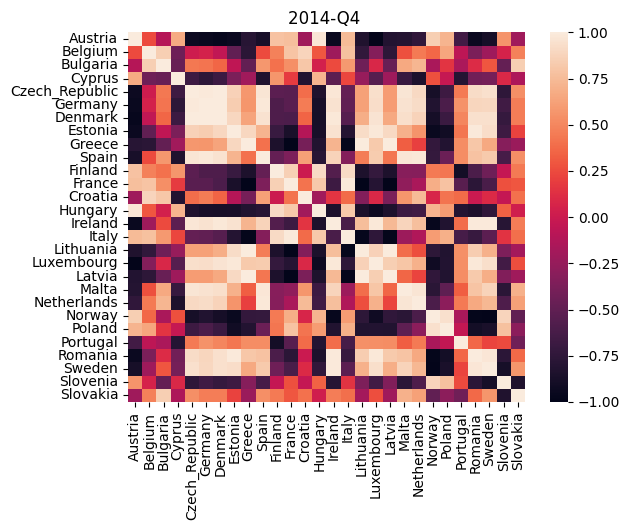

<Figure size 500x500 with 0 Axes>

In [12]:

plt.title(quarters[0])
a = sns.heatmap(results[0], yticklabels=countries, xticklabels=countries, vmin=-1, vmax=1)
plt.figure(figsize=(5,5))
a.plot()

Threshold results

In [13]:
# threshold = 0.9
th_results =  [threshold_matrix(r, threshold) for r in results]

[]

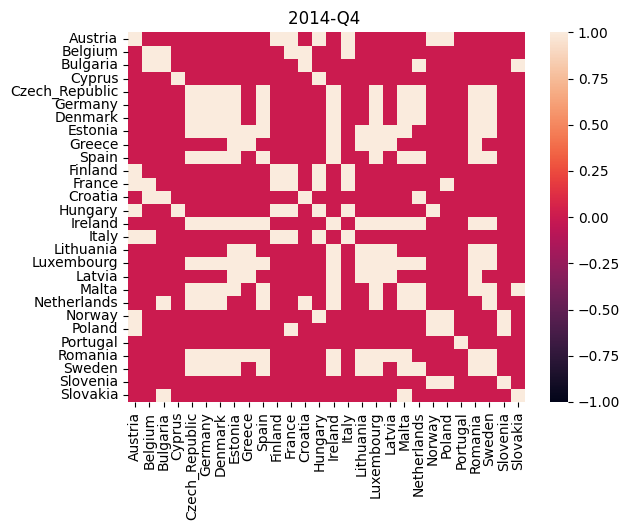

<Figure size 500x500 with 0 Axes>

In [14]:
plt.title(quarters[0])
a = sns.heatmap(th_results[0], yticklabels=countries, xticklabels=countries, vmin=-1, vmax=1)
plt.figure(figsize=(5,5))
a.plot()

<AxesSubplot: >

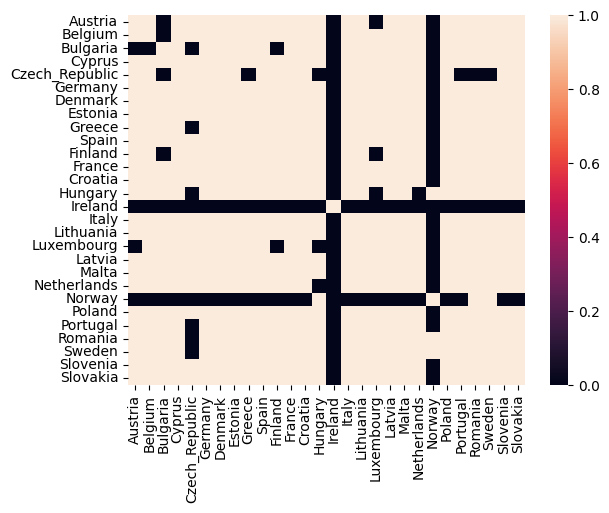

In [15]:
sns.heatmap(th_results[21], yticklabels=countries, xticklabels=countries, vmin=0, vmax=1)

Graph table:

In [16]:
def compute_graph_table(adj_mat):

    graph_table = pd.DataFrame()

    source = []
    target=[]

    a=1
    for i in range(adj_mat.columns.size):
        for j in range(adj_mat.columns.size):
            if i!=j:
                if adj_mat.iloc[i][j]==1:
                    source.append(adj_mat.columns[i])
                    target.append(adj_mat.columns[j])
        a=a+1

    type=['undirected' for i in range(len(source))]
    weight=[None for i in range(len(source))]
    graph_table['Source']=source
    graph_table['Target']=target
    graph_table['Type']=type
    graph_table['weight']=weight
    return graph_table

adj_mat = pd.DataFrame(results[0], columns=countries)
graph_table = compute_graph_table(adj_mat=adj_mat)
graph_table


Source    Target        Type weight
0     Austria   Finland  undirected   None
1     Austria    France  undirected   None
2     Austria   Hungary  undirected   None
3     Austria     Italy  undirected   None
4     Austria    Norway  undirected   None
..        ...       ...         ...    ...
187    Sweden   Romania  undirected   None
188  Slovenia    Norway  undirected   None
189  Slovenia    Poland  undirected   None
190  Slovakia  Bulgaria  undirected   None
191  Slovakia     Malta  undirected   None

[192 rows x 4 columns]

Building Graph from contingency table and country labels:

In [17]:
def build_graph(data, labels):
    adj_mat = pd.DataFrame(data, columns=labels)
    graph_table = compute_graph_table(adj_mat=adj_mat)
    G = nx.from_pandas_edgelist(graph_table, source='Source', target='Target',create_using=nx.Graph())
    for l in labels:
        if l not in G.nodes():
            G.add_node(l)
    return G

Building Graphs:

In [18]:
graphs=[]
for i in range(len(results)):
    G = build_graph(th_results[i], countries)
    graphs.append(G)

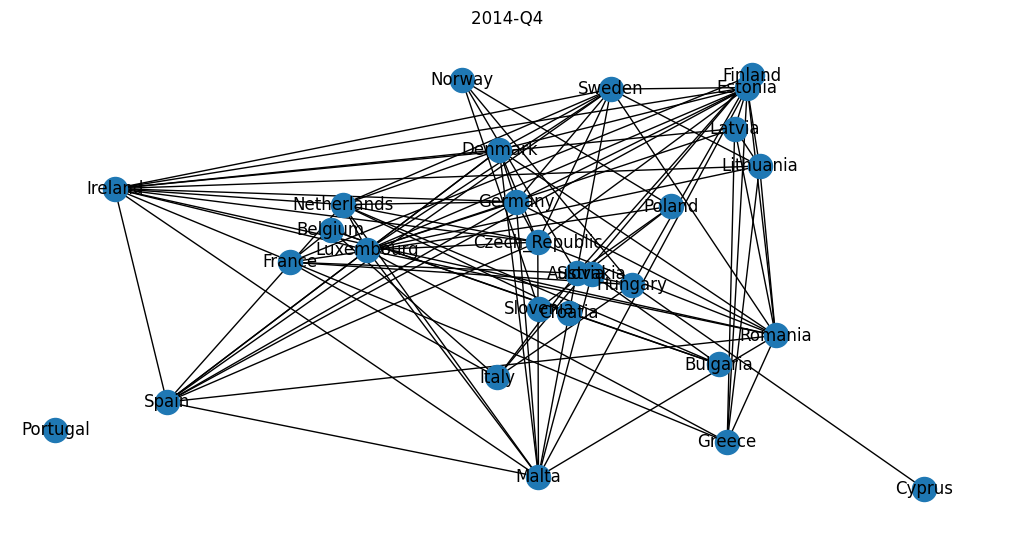

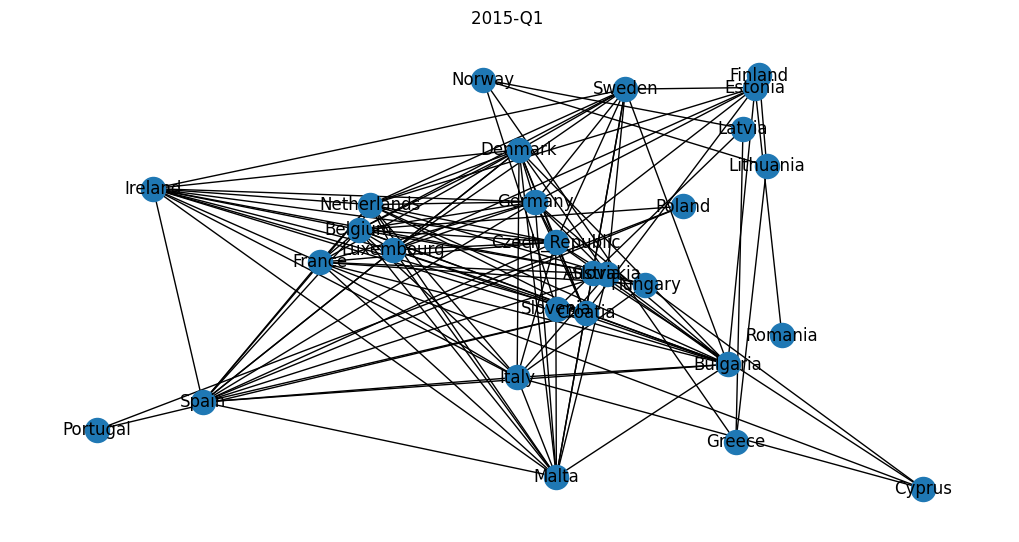

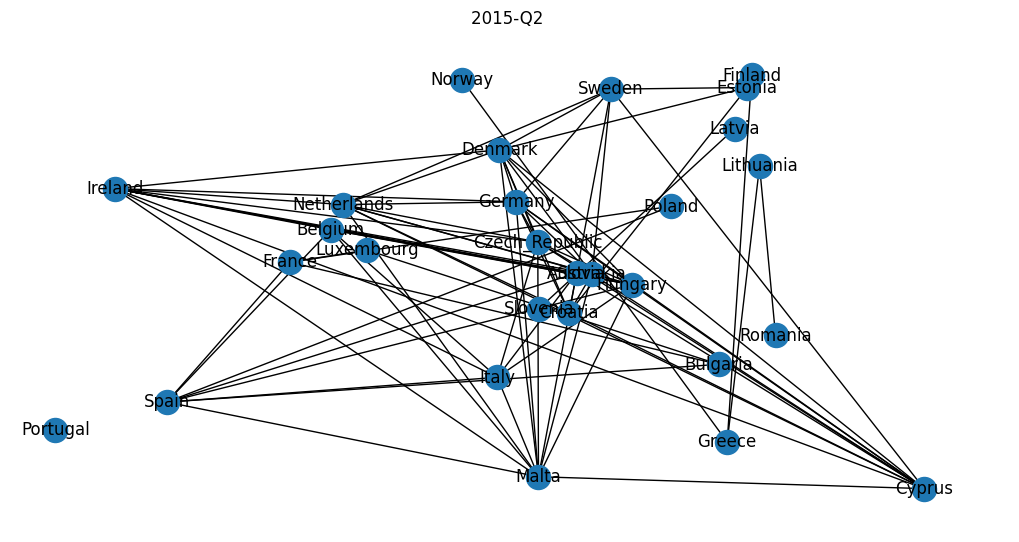

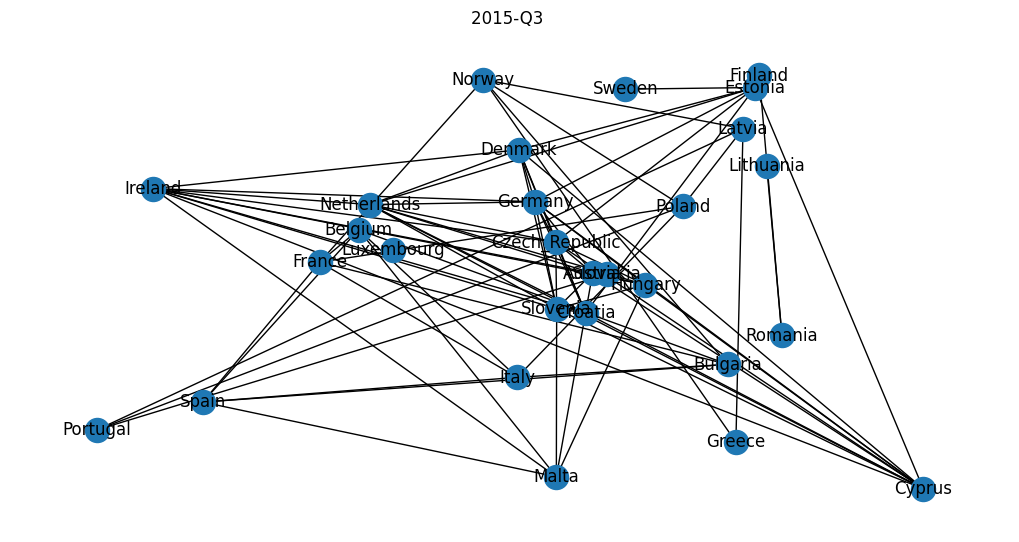

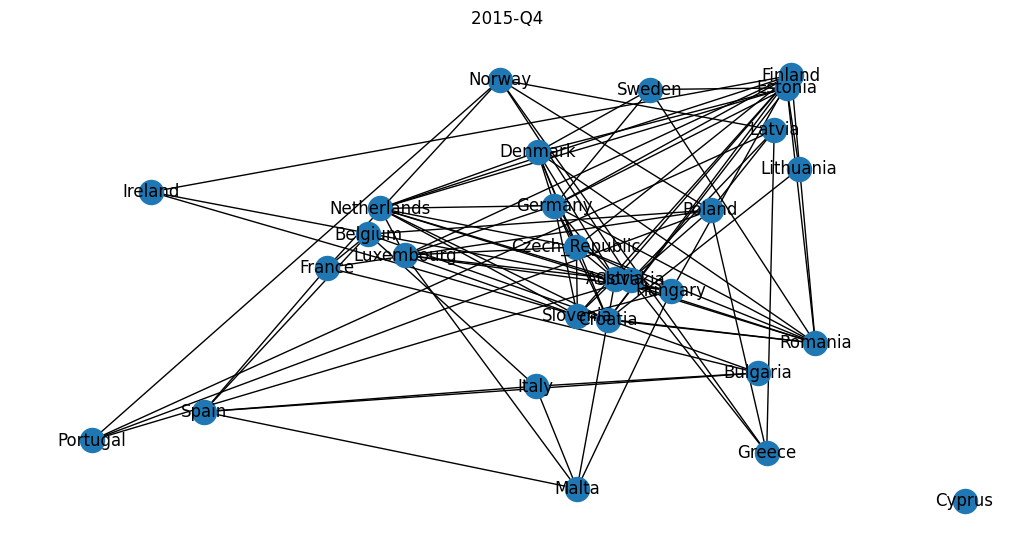

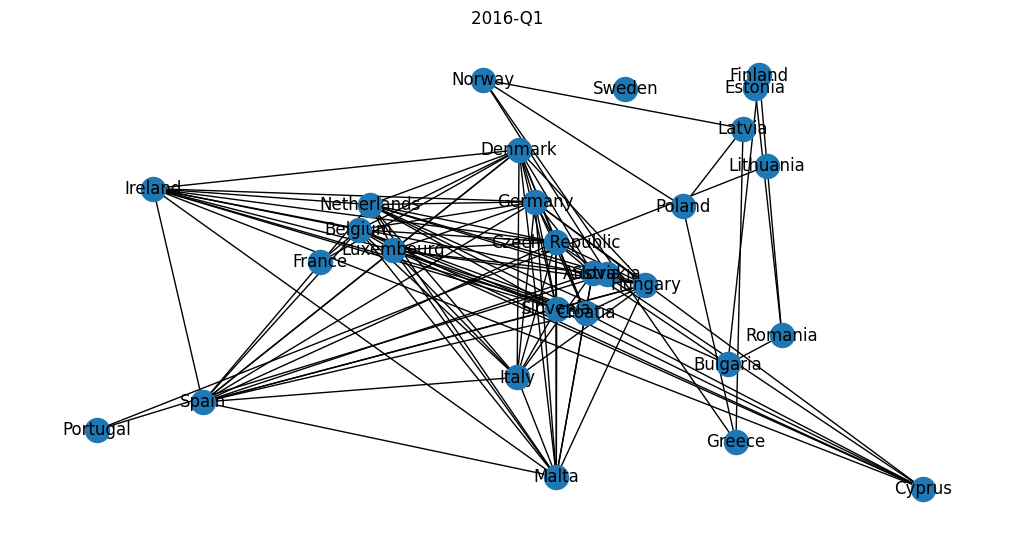

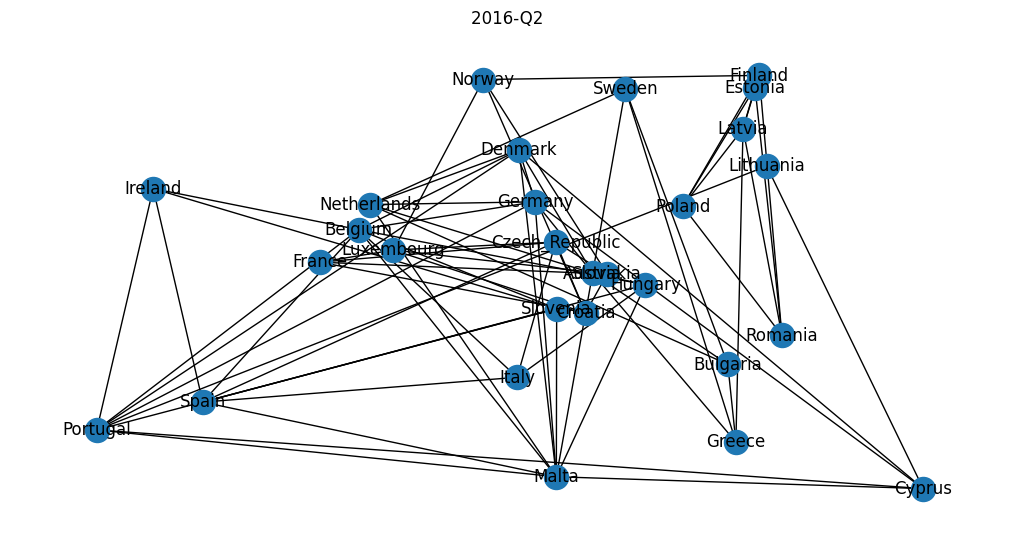

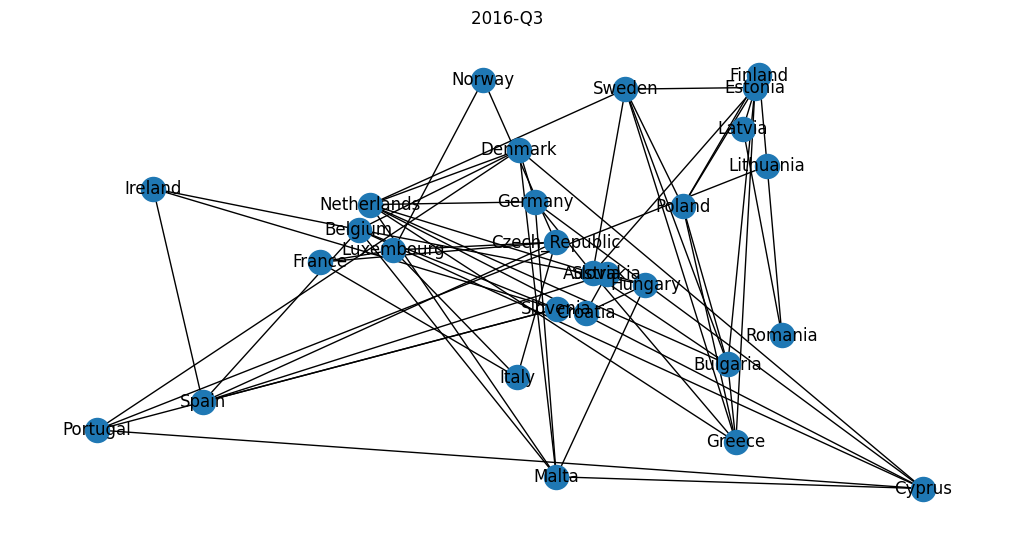

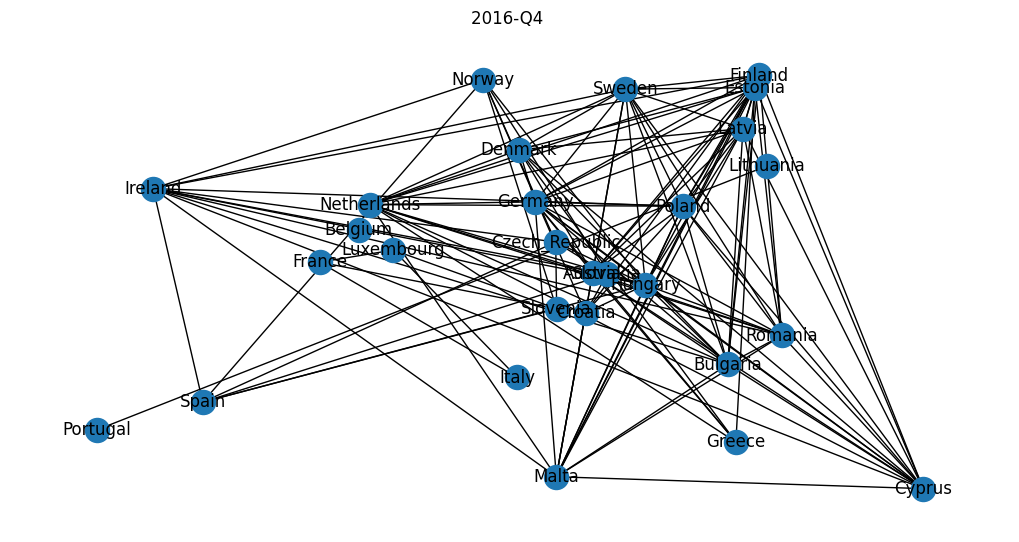

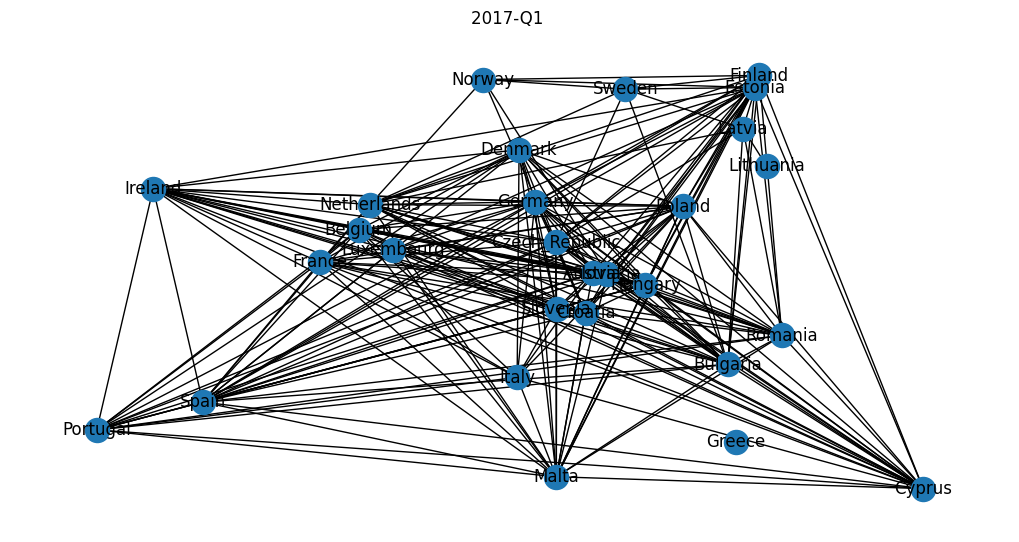

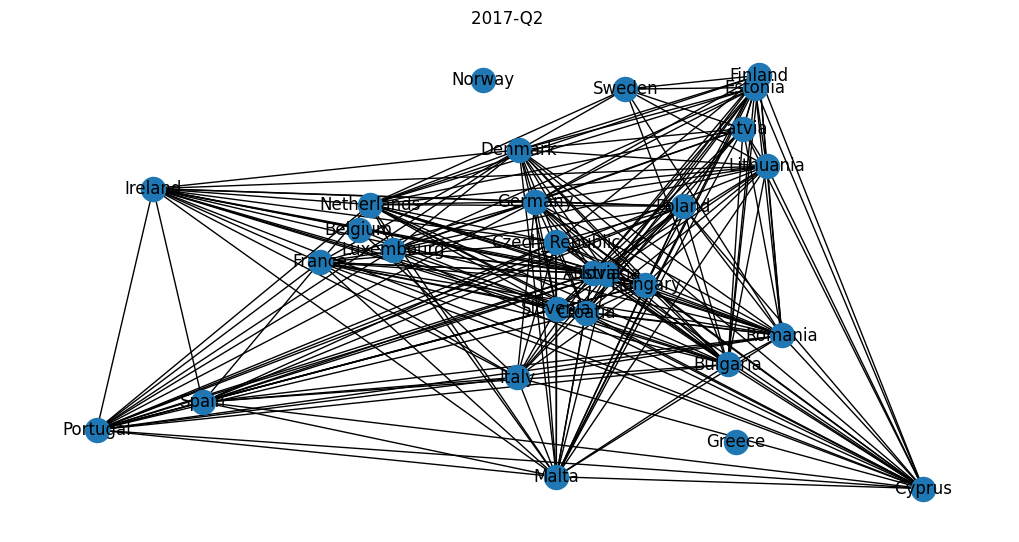

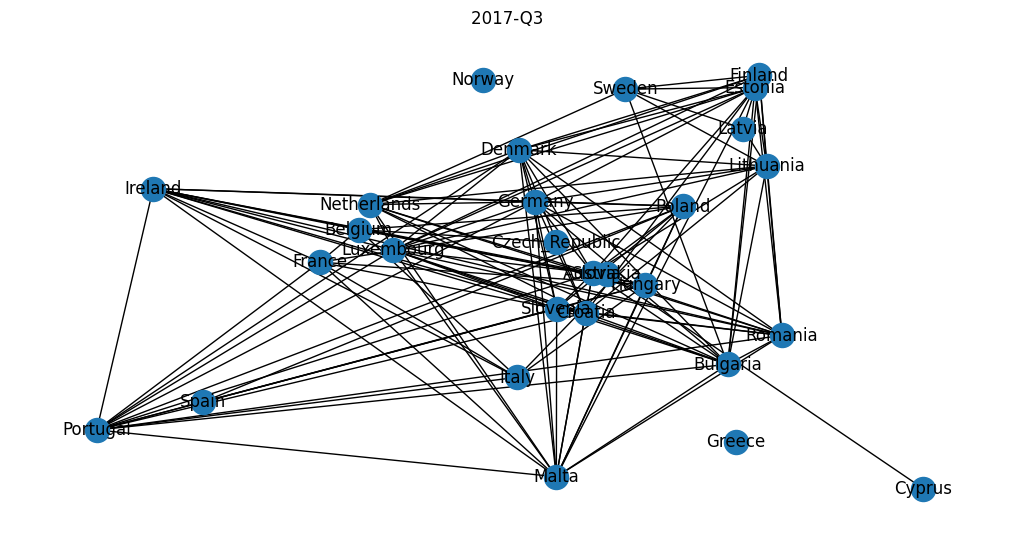

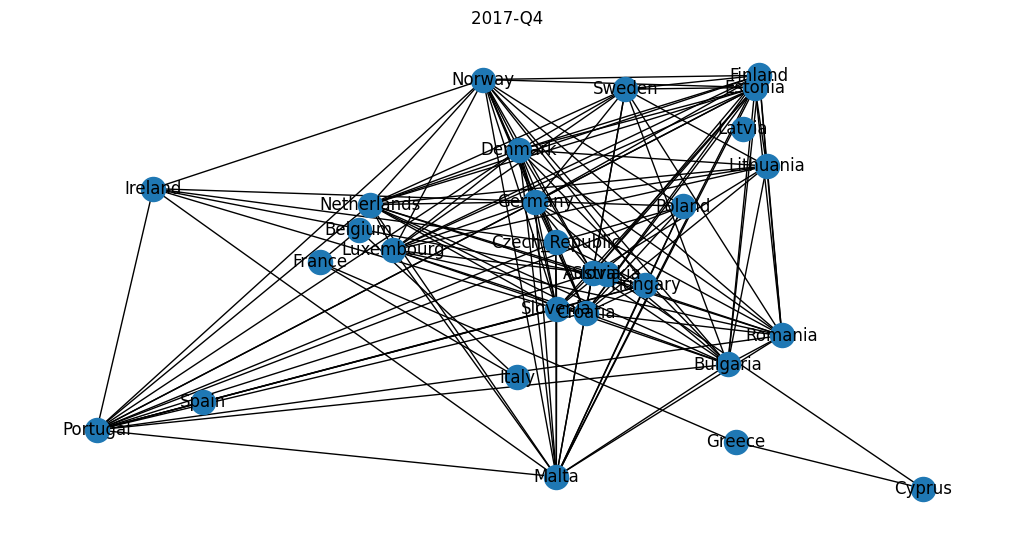

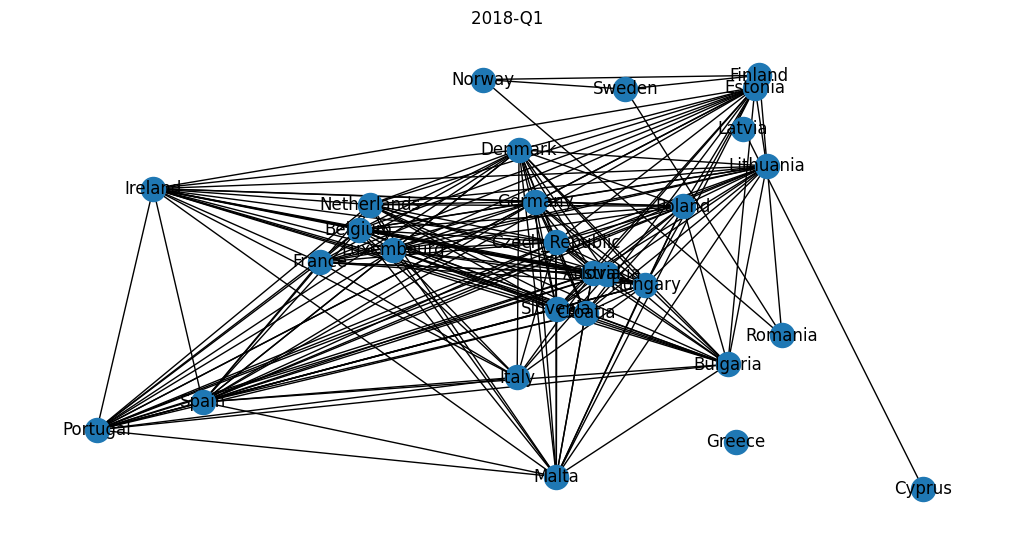

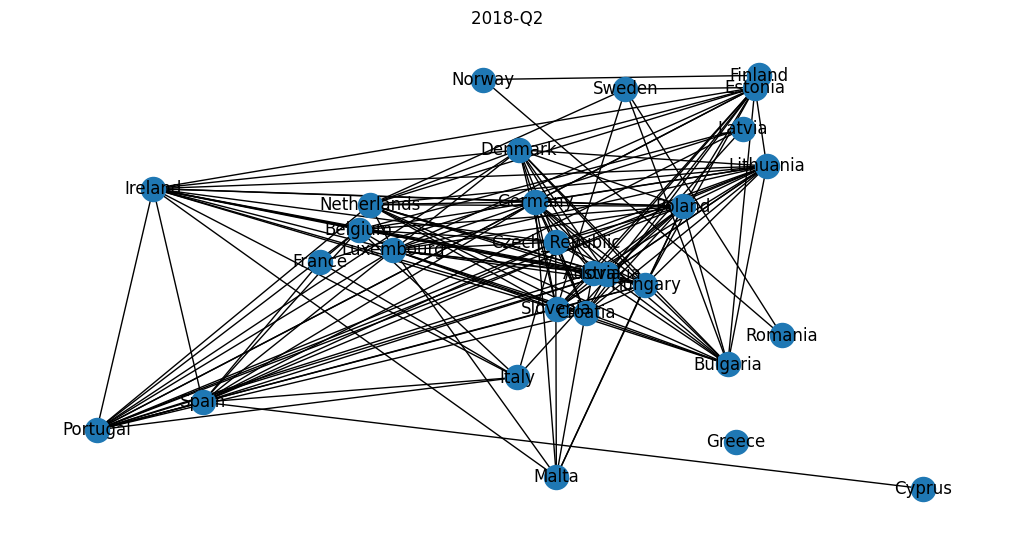

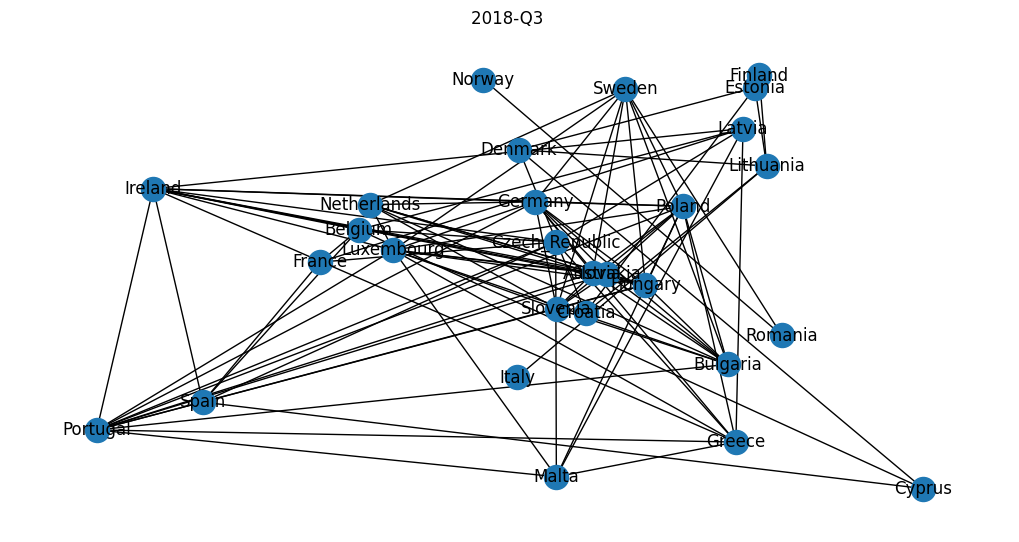

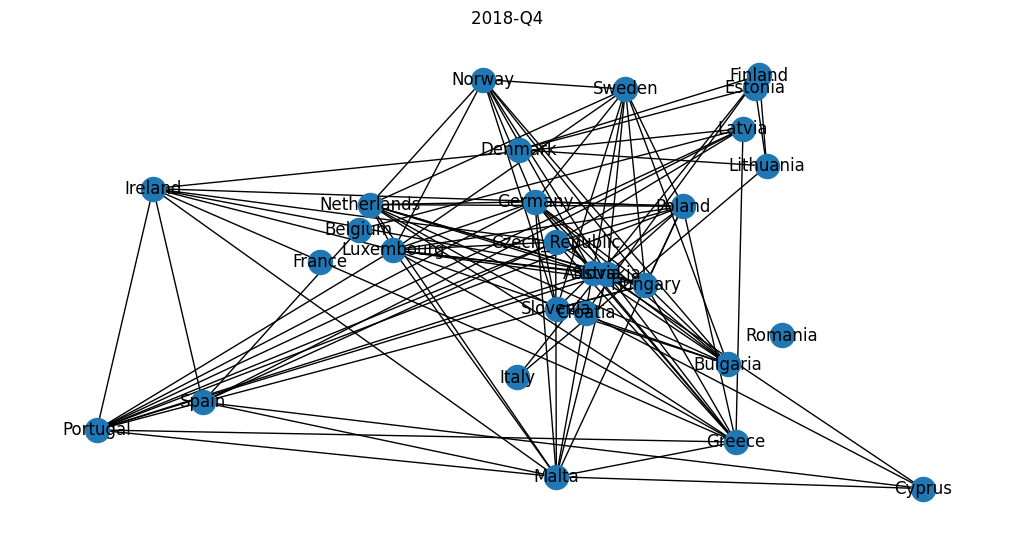

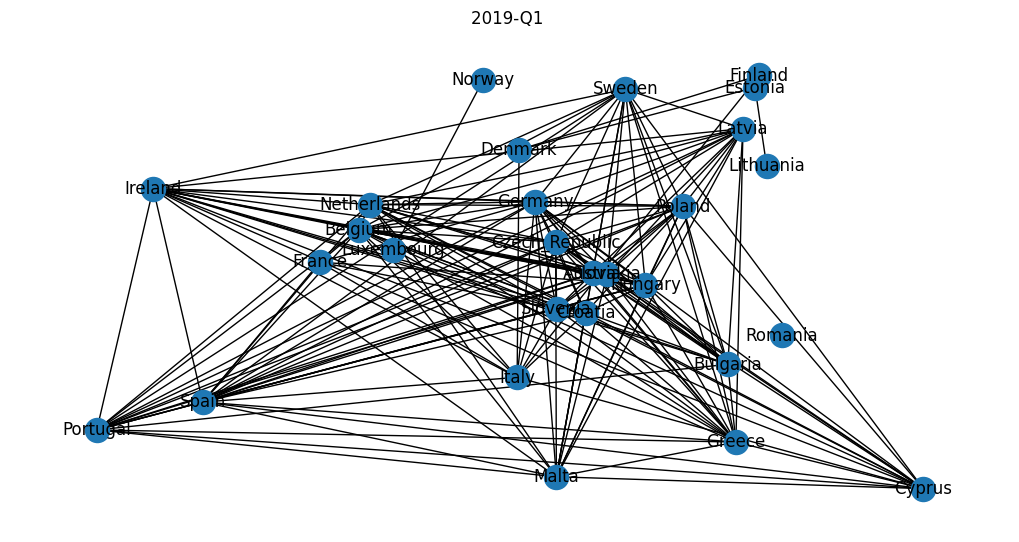

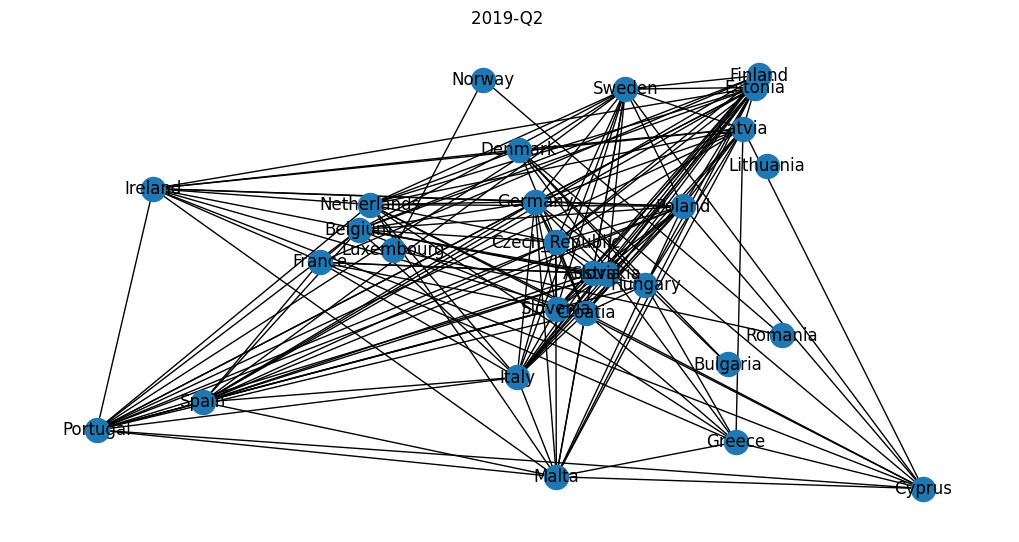

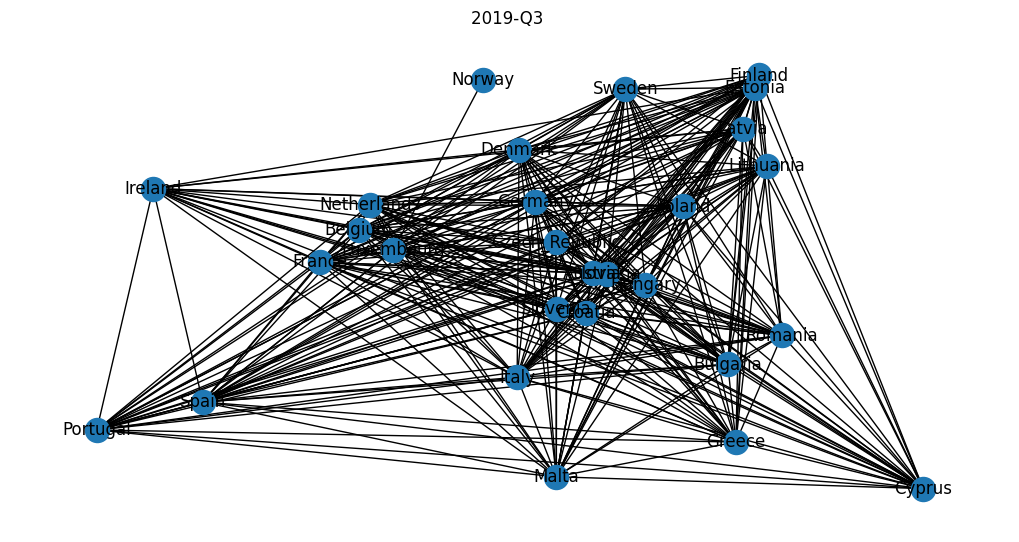

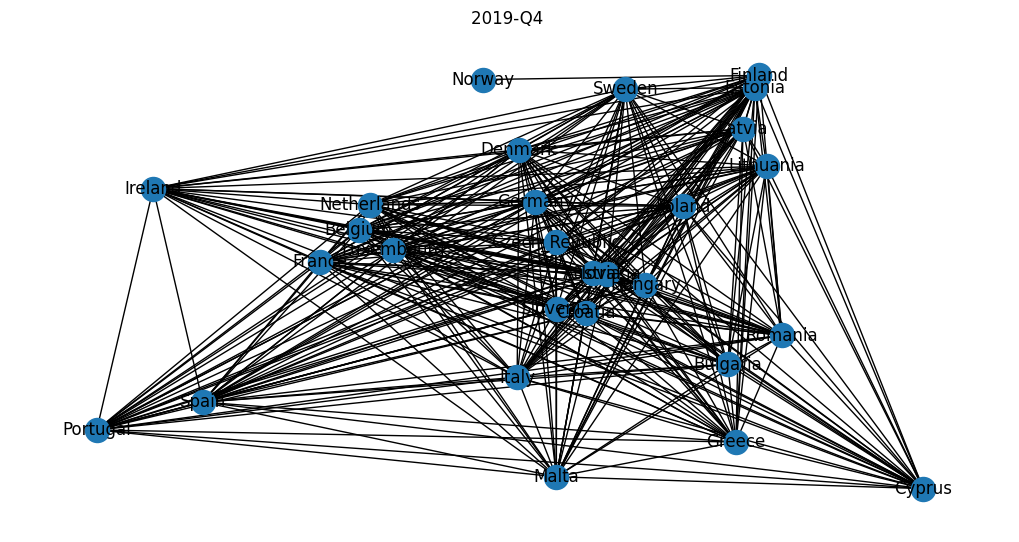

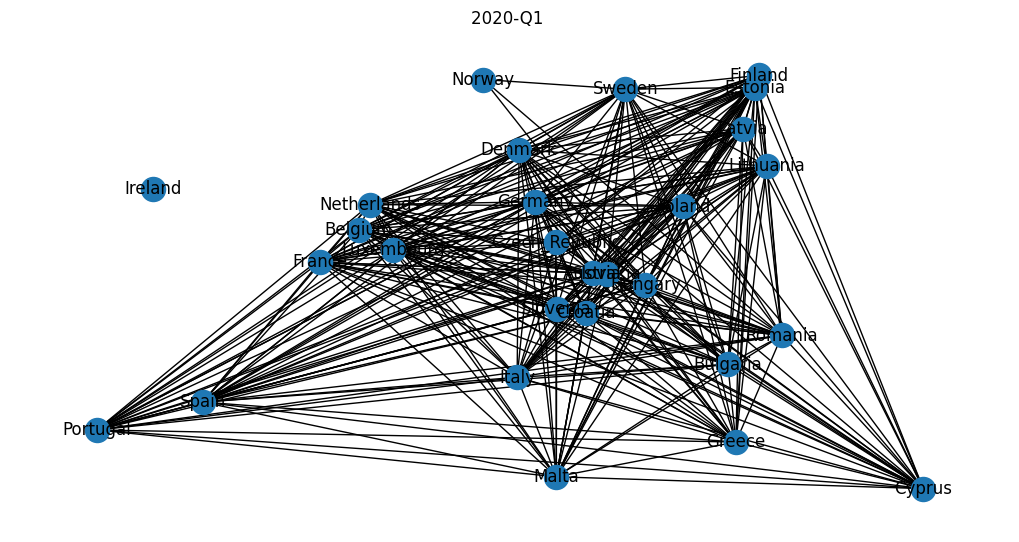

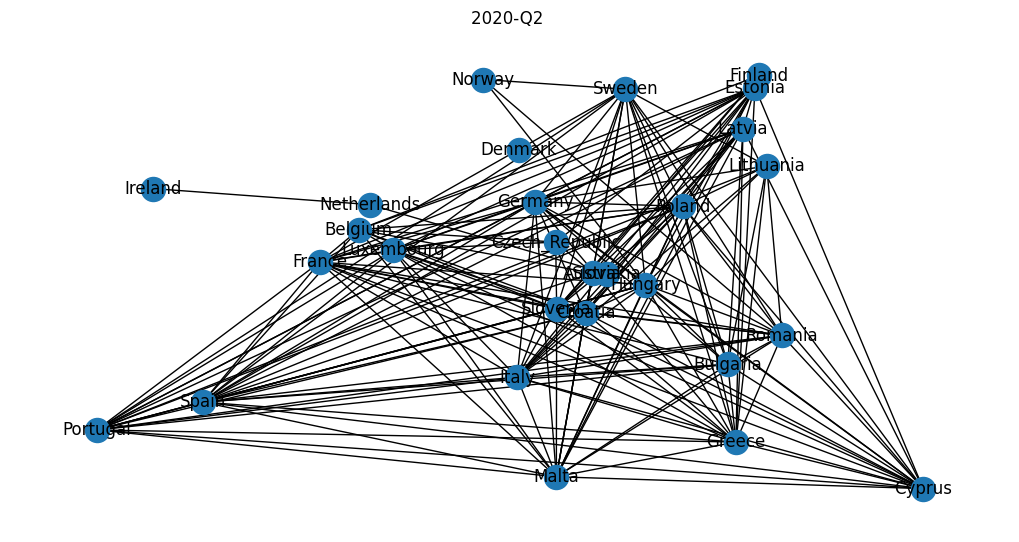

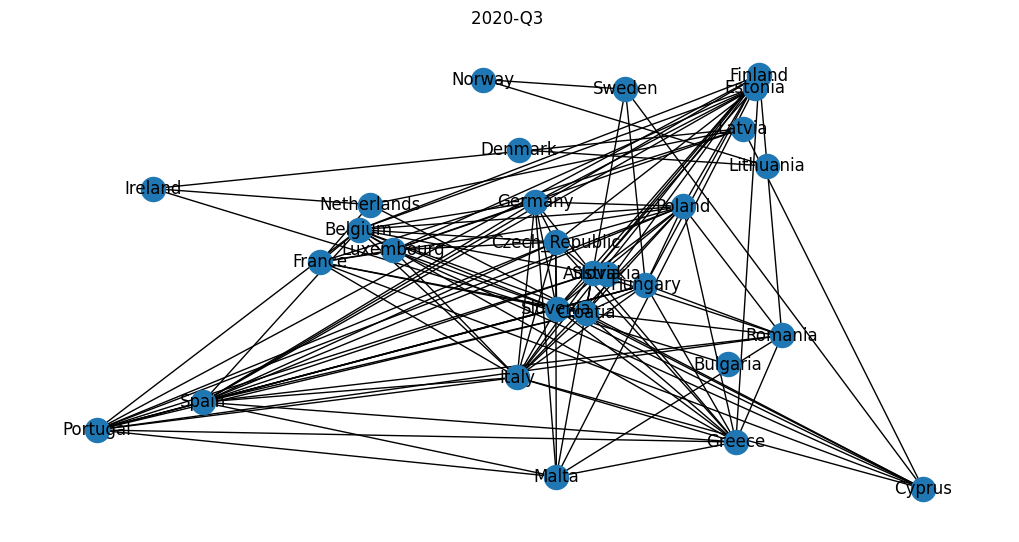

In [19]:
for i in range(len(graphs)):
    plt.figure(figsize=fig_size)
    nx.draw(graphs[i], with_labels = True, pos = pos)
    title = quarters[i]
    
    plt.title(title)
    plt.savefig(f'results/graph{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

## Connected Components

[2, 2, 4, 3, 2, 3, 1, 1, 3, 2, 3, 4, 3, 4, 2, 1, 3, 3, 3, 1, 1, 2, 2, 2]


<AxesSubplot: title={'center': 'Number of Connected Components'}>

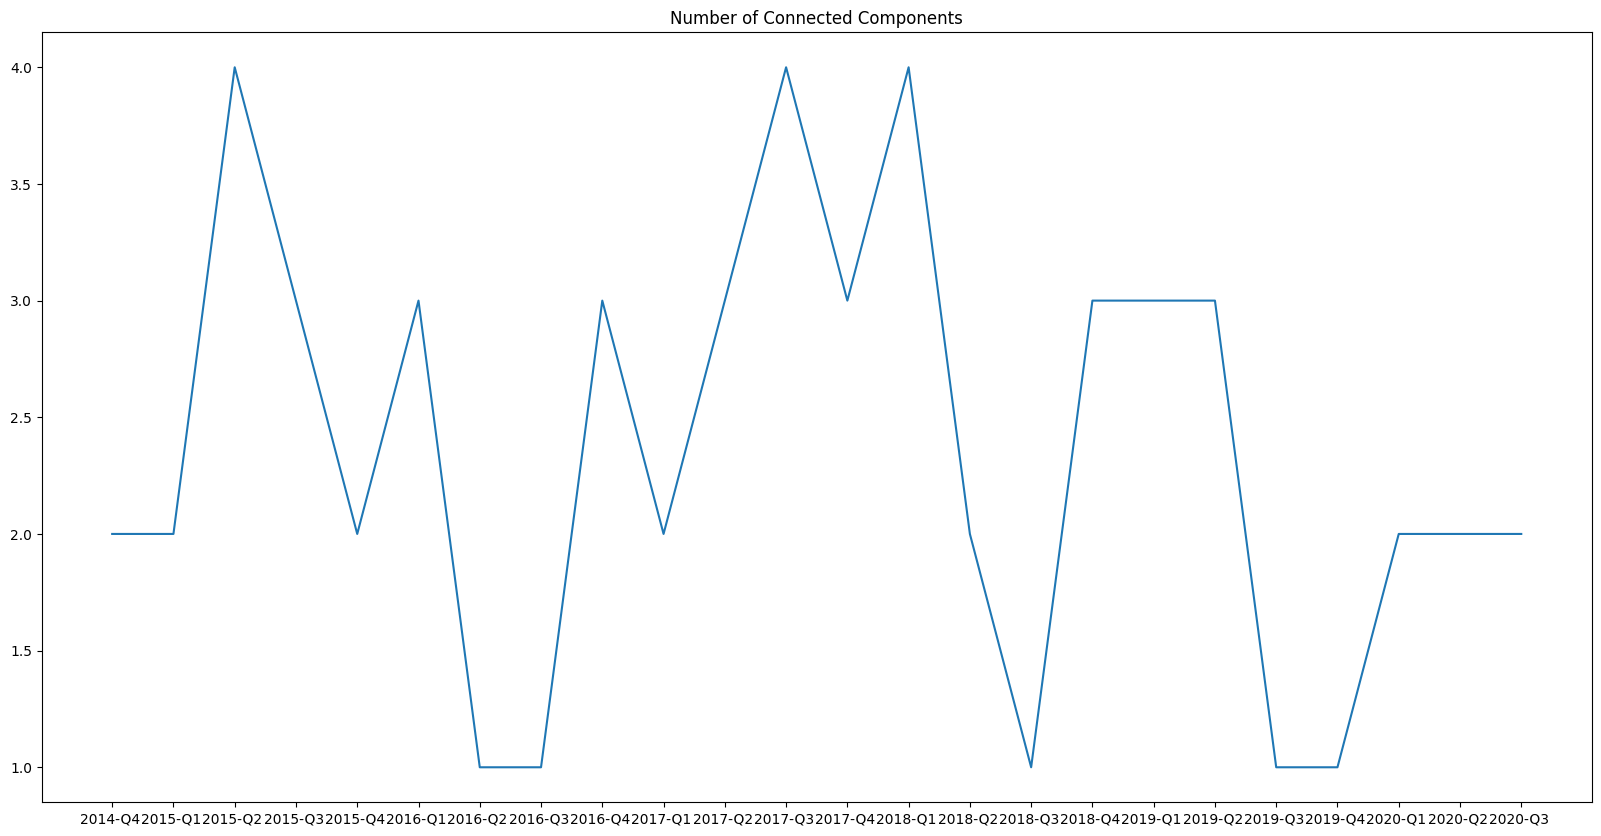

In [20]:
cc = []
for G in graphs:
    # sns.histplot(nx.betweenness_centrality(G))
    cc.append(nx.number_connected_components(G))
print(cc)
max_bc = pd.Series(cc)

plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_xticks(range(len(results)))
ax.set_xticklabels(list(quarters[:len(results)]))
plt.title("Number of Connected Components")
max_bc.plot()



## Number of Edges

[96, 123, 82, 78, 88, 108, 75, 62, 127, 223, 228, 125, 138, 192, 153, 99, 107, 177, 153, 335, 344, 315, 176, 122]


<AxesSubplot: title={'center': 'Number of Edges'}>

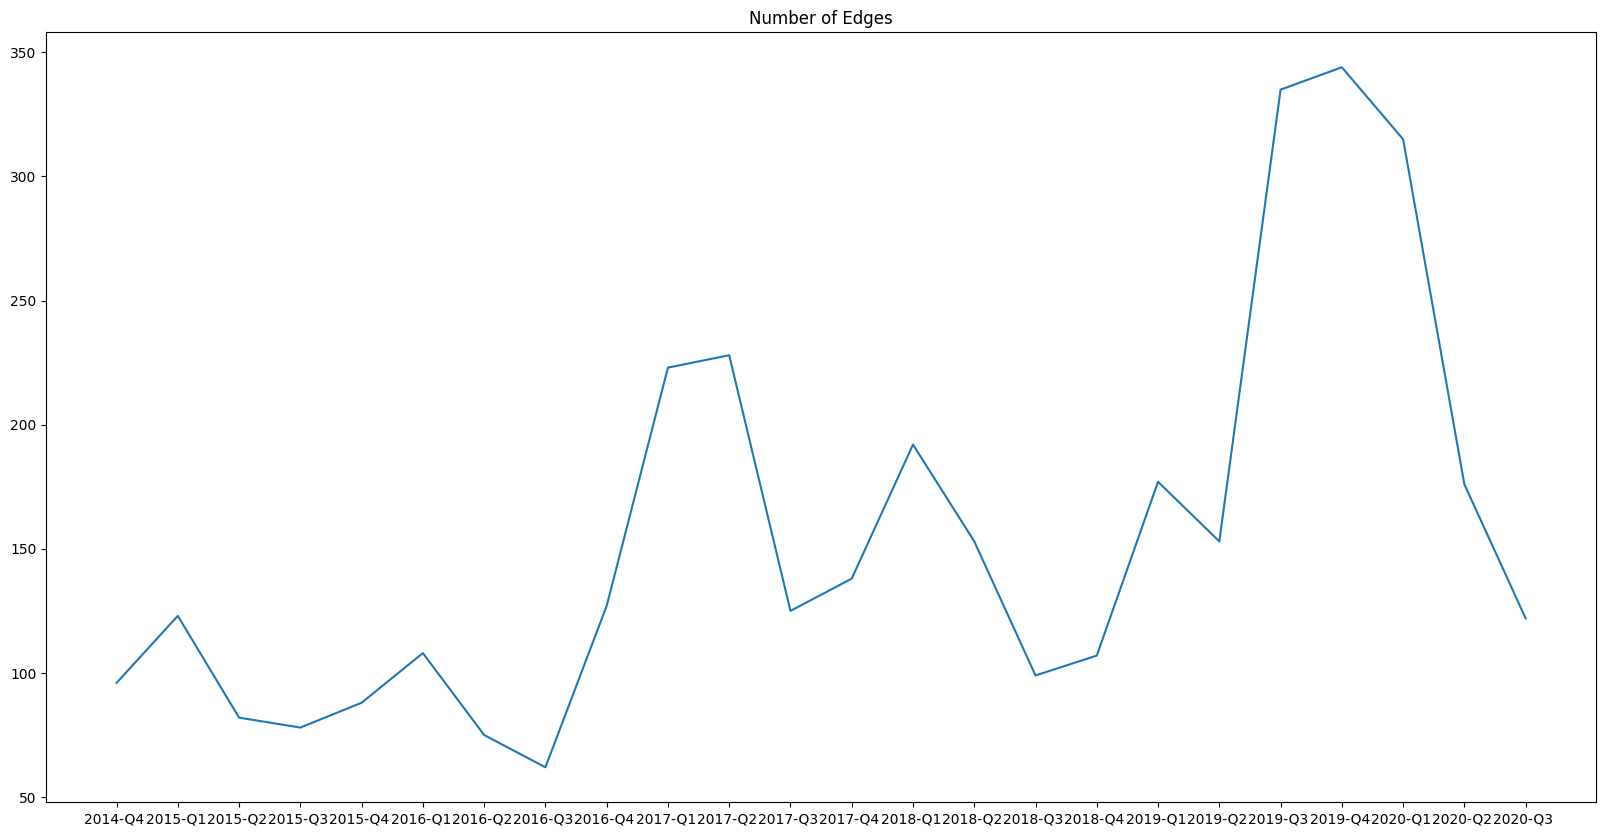

In [21]:
cc = []
for G in graphs:
    # sns.histplot(nx.betweenness_centrality(G))
    cc.append(nx.number_of_edges(G))
print(cc)
max_bc = pd.Series(cc)


plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_xticks(range(len(results)))
ax.set_xticklabels(list(quarters[:len(results)]))
plt.title("Number of Edges")
max_bc.plot()

Matrix Export for UCI

In [22]:
for i in range(len(th_results)):
    df = pd.DataFrame(th_results[i], columns=countries)
    df.index = countries
    df.to_csv(path_or_buf=f"graph_adjmats/{quarters[i]}.txt", sep=" ")


## Border Graph Plotting

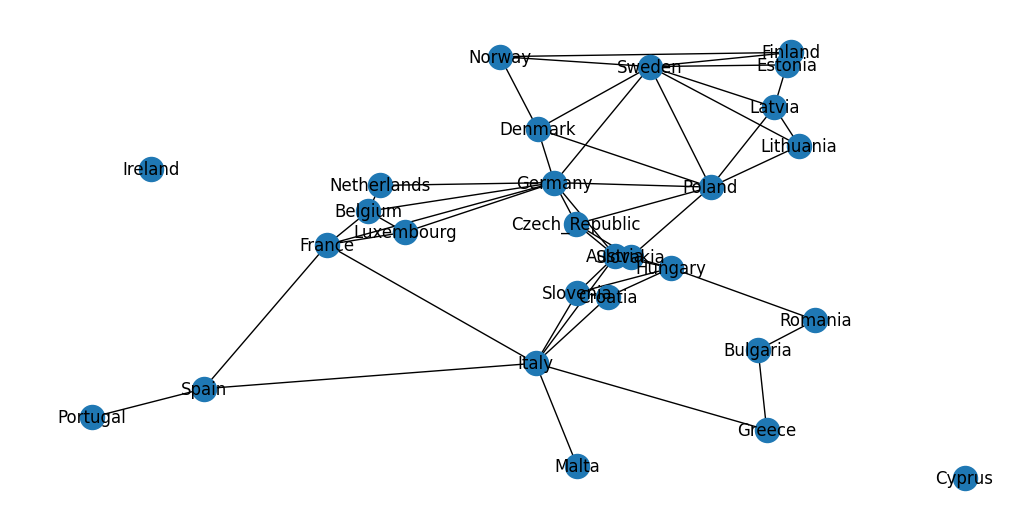

In [23]:
border_graph = nx.read_adjlist("borders.adjlist")

plt.figure(figsize=fig_size)
nx.draw(border_graph, with_labels = True, pos = pos)

## Networks GED w.r.t. borders graph

2014-Q4 : [[0.         0.77419355]
 [1.         0.        ]]
2015-Q1 : [[0.         0.80597015]
 [1.         0.        ]]
2015-Q2 : [[0.         0.74647887]
 [1.         0.        ]]
2015-Q3 : [[0.         0.80882353]
 [1.         0.        ]]
2015-Q4 : [[0.         0.98039216]
 [1.         0.        ]]
2016-Q1 : [[0.         0.87323944]
 [1.         0.        ]]
2016-Q2 : [[0.        0.8852459]
 [1.        0.       ]]
2016-Q3 : [[0.         0.90909091]
 [1.         0.        ]]
2016-Q4 : [[0.         0.75675676]
 [1.         0.        ]]
2017-Q1 : [[0.         0.58947368]
 [1.         0.        ]]
2017-Q2 : [[0.        0.6043956]
 [1.        0.       ]]
2017-Q3 : [[0.         0.86363636]
 [1.         0.        ]]
2017-Q4 : [[0.         0.94915254]
 [1.         0.        ]]
2018-Q1 : [[0.         0.75362319]
 [1.         0.        ]]
2018-Q2 : [[0.         0.74242424]
 [1.         0.        ]]
2018-Q3 : [[0.         0.85245902]
 [1.         0.        ]]
2018-Q4 : [[0.        0.9047619]

[Text(0, 0, '2014-Q4 '),
 Text(1, 0, '2015-Q1 '),
 Text(2, 0, '2015-Q2 '),
 Text(3, 0, '2015-Q3 '),
 Text(4, 0, '2015-Q4 '),
 Text(5, 0, '2016-Q1 '),
 Text(6, 0, '2016-Q2 '),
 Text(7, 0, '2016-Q3 '),
 Text(8, 0, '2016-Q4 '),
 Text(9, 0, '2017-Q1 '),
 Text(10, 0, '2017-Q2 '),
 Text(11, 0, '2017-Q3 '),
 Text(12, 0, '2017-Q4 '),
 Text(13, 0, '2018-Q1 '),
 Text(14, 0, '2018-Q2 '),
 Text(15, 0, '2018-Q3 '),
 Text(16, 0, '2018-Q4 '),
 Text(17, 0, '2019-Q1 '),
 Text(18, 0, '2019-Q2 '),
 Text(19, 0, '2019-Q3 '),
 Text(20, 0, '2019-Q4 '),
 Text(21, 0, '2020-Q1 '),
 Text(22, 0, '2020-Q2 '),
 Text(23, 0, '2020-Q3 ')]

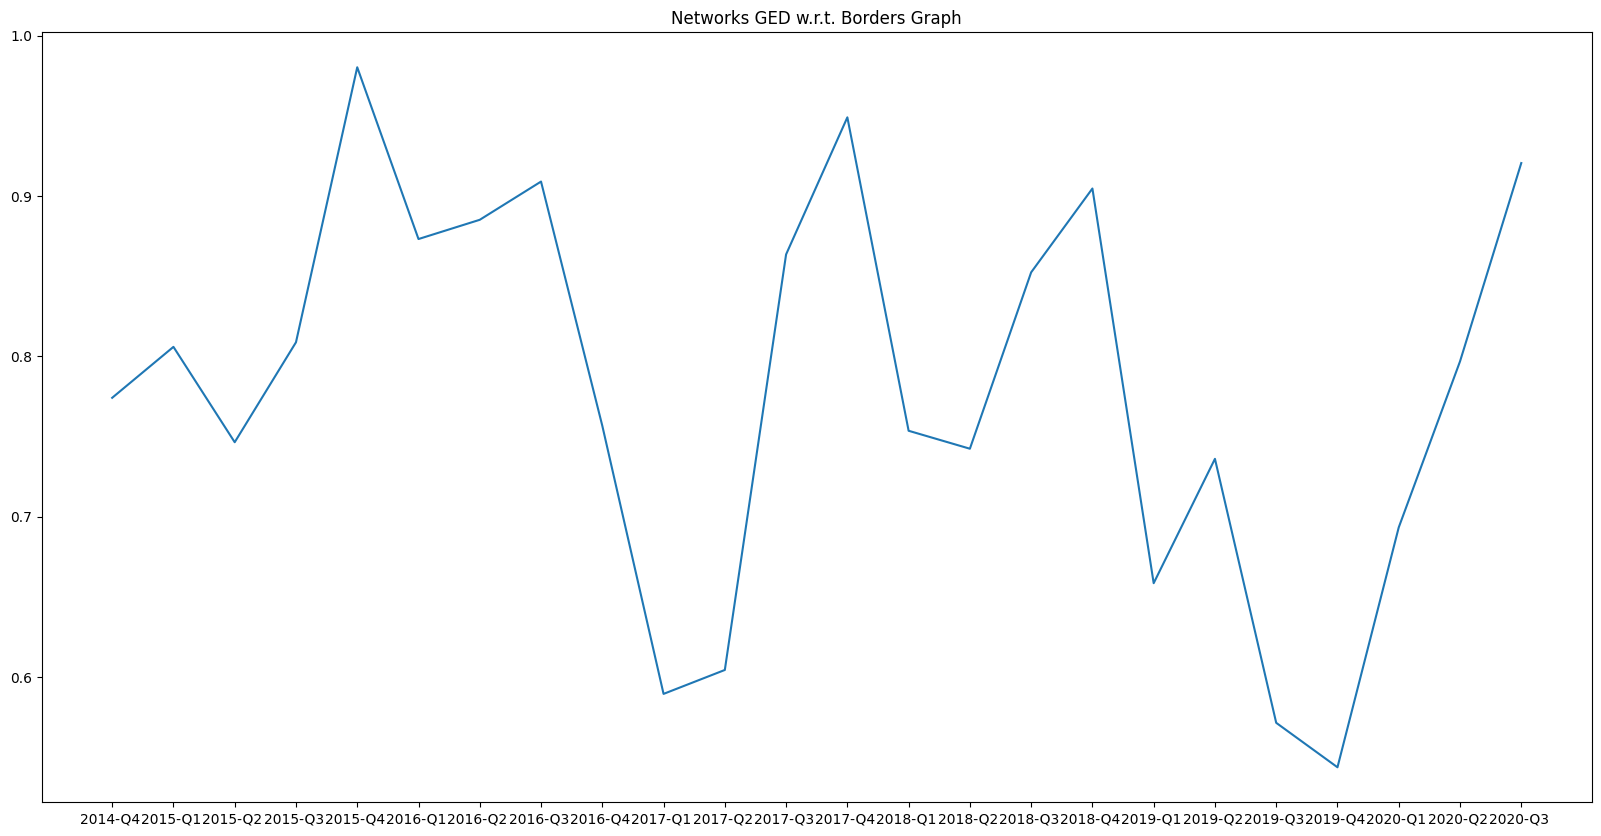

In [24]:
ged=gm.GraphEditDistance(1,1,1,1)
ged_graphs_topological = []

for g in range(len(graphs)):
    result=ged.compare([graphs[g], border_graph],None)
    ged_graphs_topological.append(ged.distance(result)[0,1])
    print(f"{quarters[g]}: {ged.distance(result)}")

plt.figure(figsize=(20,10))
plt.title("Networks GED w.r.t. Borders Graph")
g = sns.lineplot(ged_graphs_topological)
g.set_xticks(range(len(ged_graphs_topological)))
g.set_xticklabels(quarters[:len(ged_graphs_topological)])

## Average Network Clustering Coeff.

[Text(0, 0, '2014-Q4 '),
 Text(1, 0, '2015-Q1 '),
 Text(2, 0, '2015-Q2 '),
 Text(3, 0, '2015-Q3 '),
 Text(4, 0, '2015-Q4 '),
 Text(5, 0, '2016-Q1 '),
 Text(6, 0, '2016-Q2 '),
 Text(7, 0, '2016-Q3 '),
 Text(8, 0, '2016-Q4 '),
 Text(9, 0, '2017-Q1 '),
 Text(10, 0, '2017-Q2 '),
 Text(11, 0, '2017-Q3 '),
 Text(12, 0, '2017-Q4 '),
 Text(13, 0, '2018-Q1 '),
 Text(14, 0, '2018-Q2 '),
 Text(15, 0, '2018-Q3 '),
 Text(16, 0, '2018-Q4 '),
 Text(17, 0, '2019-Q1 '),
 Text(18, 0, '2019-Q2 '),
 Text(19, 0, '2019-Q3 '),
 Text(20, 0, '2019-Q4 '),
 Text(21, 0, '2020-Q1 '),
 Text(22, 0, '2020-Q2 '),
 Text(23, 0, '2020-Q3 ')]

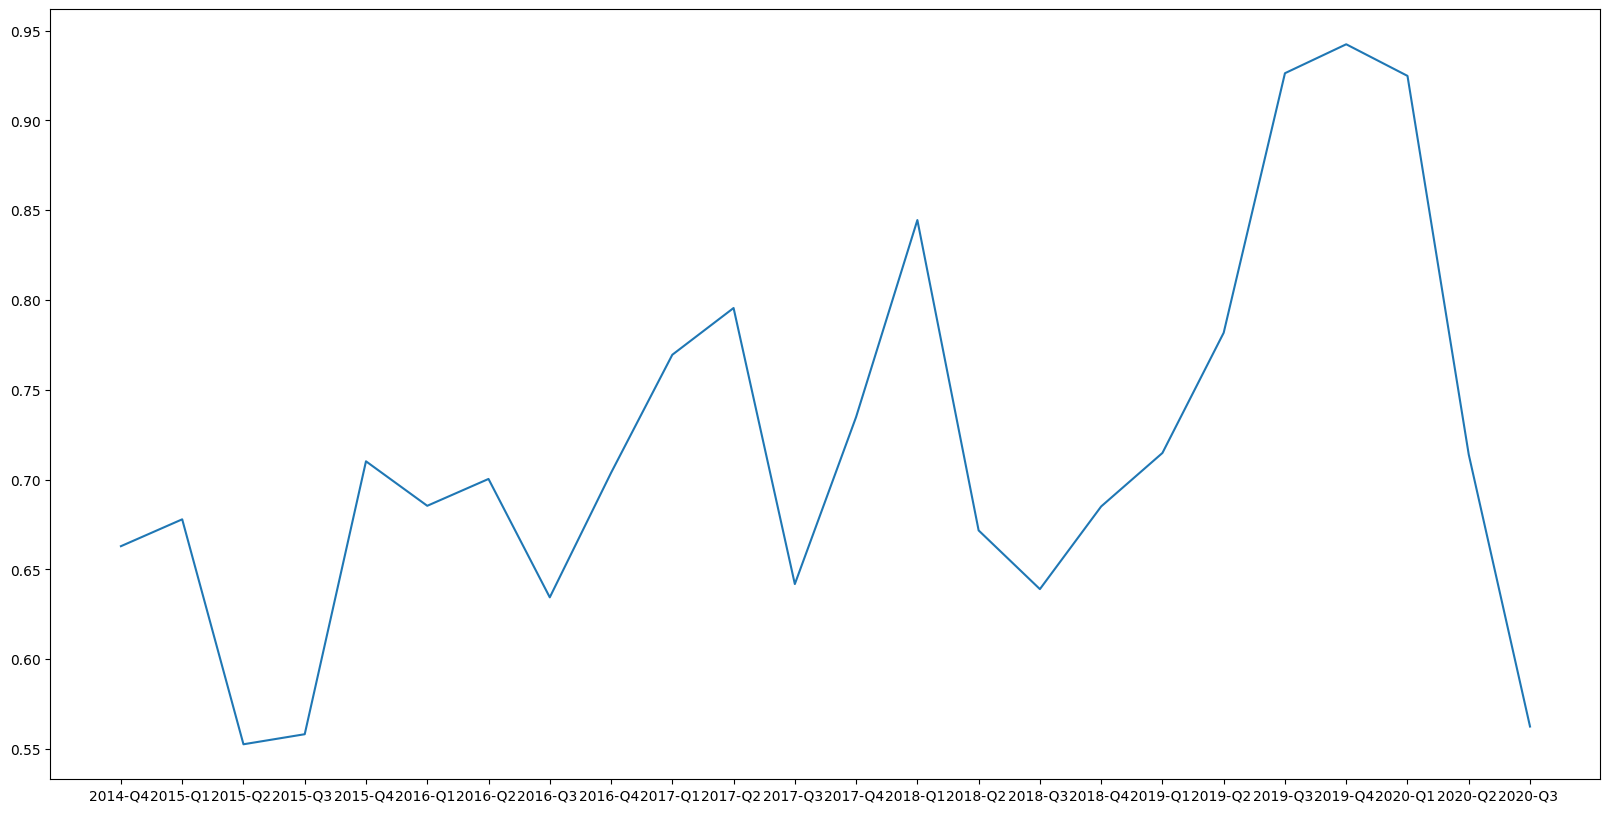

In [25]:
lc_averages = []
for g in graphs:
    lc_averages.append(np.average([value for key,value in nx.clustering(g).items()]))

plt.figure(figsize=(20,10))
g = sns.lineplot(data=lc_averages)
g.set_xticks(range(len(lc_averages)))
g.set_xticklabels(quarters[:len(lc_averages)])

## Triadic Census

- 2015-Q2: Lowest Clustering Coeff.
- 2016-Q3: lowest amount of Edges among 1 Connected Component Graphs
- 2017-Q1: Second lowest GED (distance) and fewer  edges compared to 2019-Q4
- 2019-Q4: Max edges and lowest GED (distance) from Topological border graph

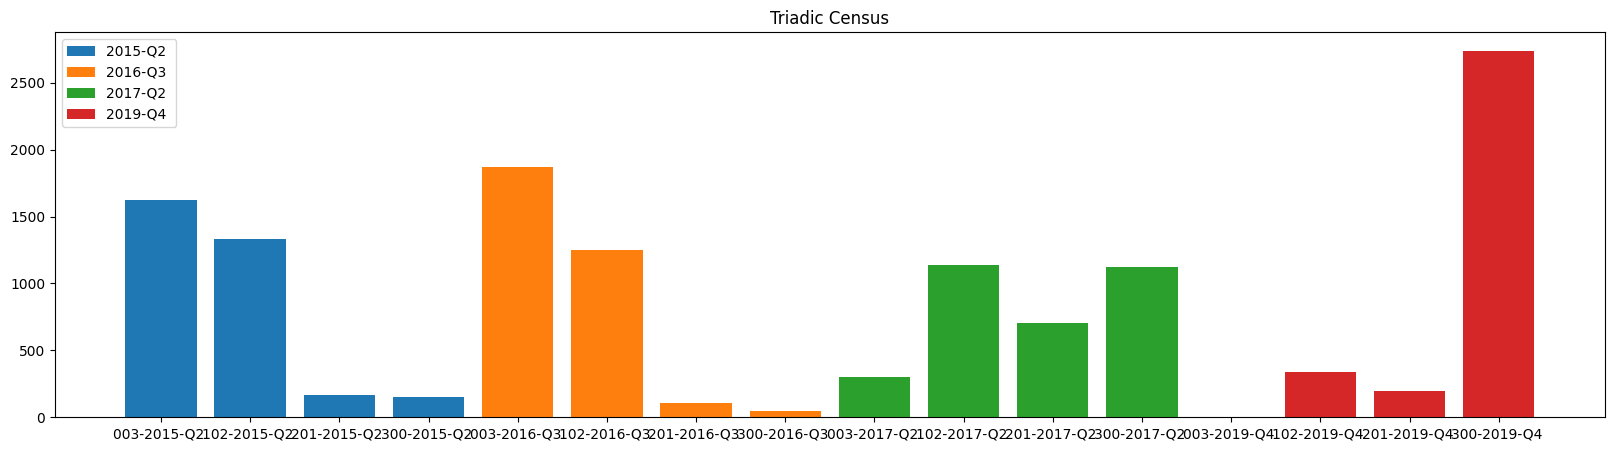

In [26]:
plt.figure(figsize=(20,5))
quarter_list=["2015-Q2 ", "2016-Q3 ", "2017-Q2 ", "2019-Q4 "]
for quarter in quarter_list:
    census = nx.triadic_census(graphs[quarters.index(quarter)].to_directed())
    unidirected_triads = ["003", "102", "201", "300"] 
    plt.bar([f"{t}-{quarter}"for t in unidirected_triads],[census[k] for k in unidirected_triads])

plt.legend(quarter_list)
plt.title("Triadic Census")
plt.show()

## Betweenness Centrality

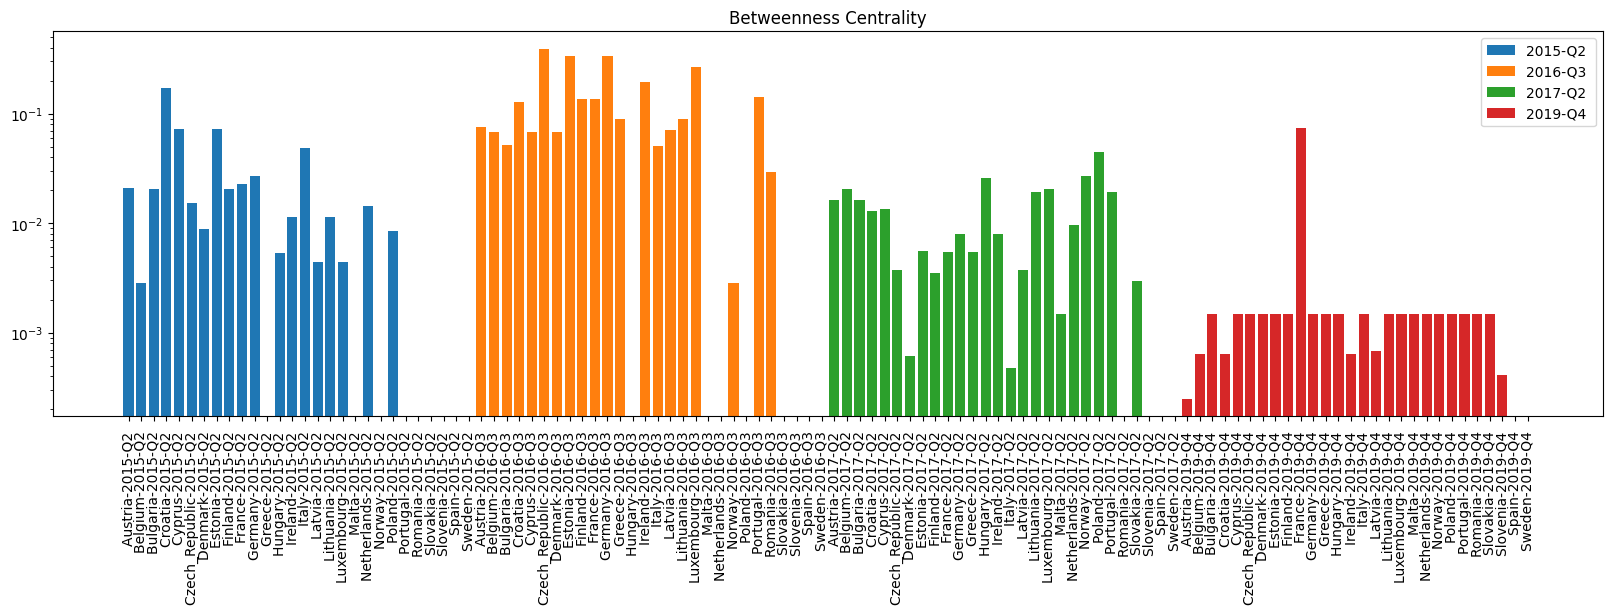

In [27]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)

for quarter in quarter_list:
    btw = nx.betweenness_centrality(graphs[quarters.index(quarter)])
    
    # plt.figure(figsize=(30,10))
    
    plt.bar([f"{k}-{quarter}"for k in sorted(btw.keys(), key=lambda x:x.lower())], btw.values())

plt.rcParams["figure.autolayout"] = True
plt.legend(quarter_list)
plt.yscale('log')
# plt.bar(tags, values)
plt.title("Betweenness Centrality")

plt.show()


## Closeness Centrality

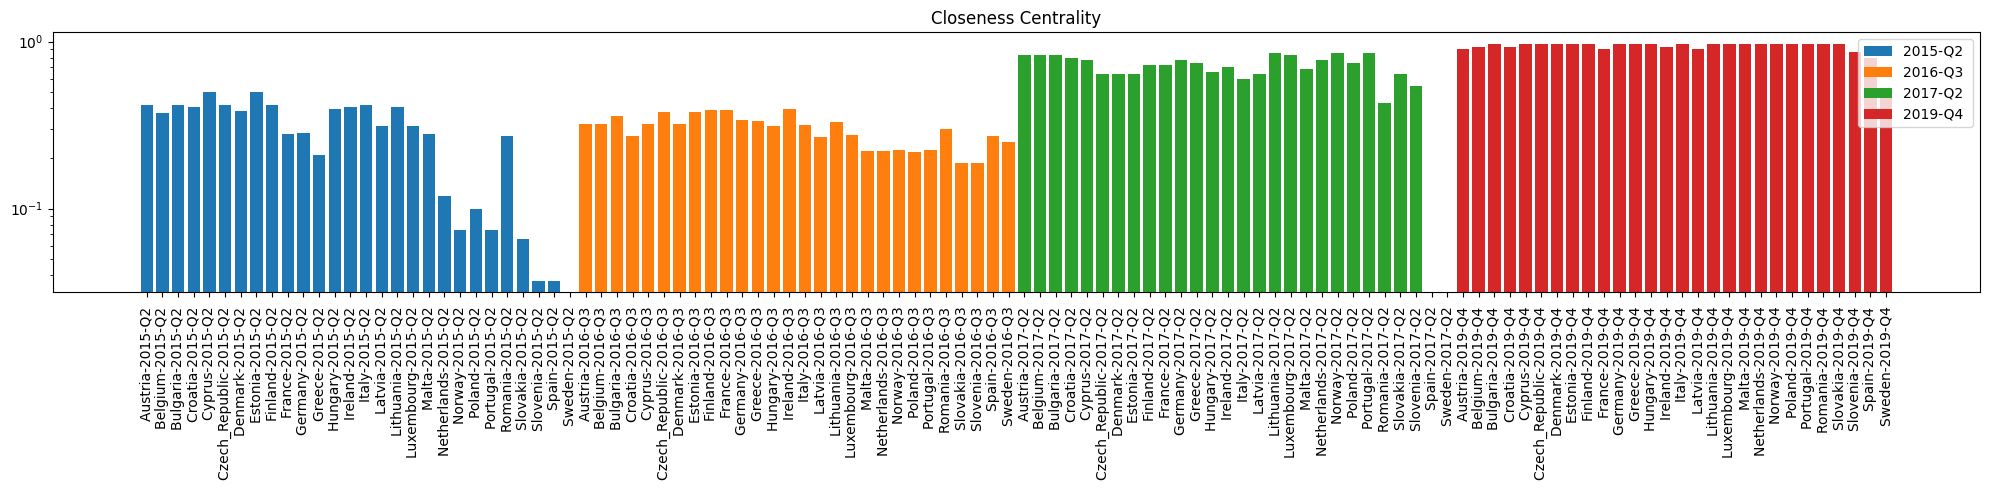

In [28]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)

for quarter in quarter_list:
    btw = nx.closeness_centrality(graphs[quarters.index(quarter)])
    plt.rcParams["figure.autolayout"] = True
    # plt.figure(figsize=(30,10))
    
    plt.bar([f"{k}-{quarter}"for k in sorted(btw.keys(), key=lambda x:x.lower())], btw.values())
plt.legend(quarter_list)
plt.yscale('log')
# plt.bar(tags, values)
plt.title("Closeness Centrality")

plt.show()

## Degree Centrality

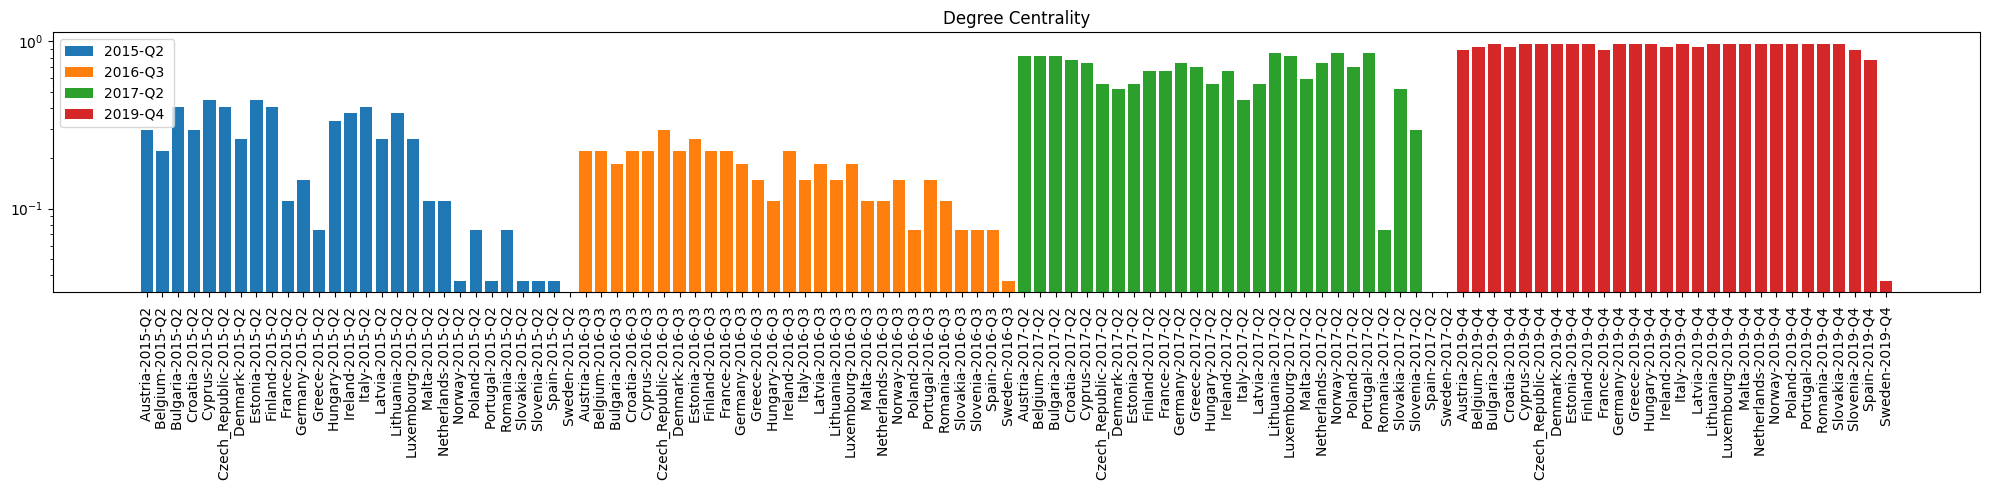

In [29]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)

for quarter in quarter_list:
    btw = nx.degree_centrality(graphs[quarters.index(quarter)])
    plt.rcParams["figure.autolayout"] = True
    # plt.figure(figsize=(30,10))
    
    plt.bar([f"{k}-{quarter}"for k in sorted(btw.keys(), key=lambda x:x.lower())], btw.values())
plt.legend(quarter_list)
plt.yscale('log')
# plt.bar(tags, values)
plt.title("Degree Centrality")

plt.show()

## Panther top-k Similarity (Doesn't work that well)

In [32]:
panther_top_k = {}
for g in graphs:
    try:    
        panther_top_k[quarters[graphs.index(g)]]=nx.panther_similarity(g,"Cyprus",k = 4)
    except ValueError:
        pass  

for key, value in panther_top_k.items():
    print(f"{key}: \n {list(value.keys())}")


2015-Q1 : 
 ['Hungary', 'France', 'Austria']
2016-Q2 : 
 ['Denmark', 'Germany', 'Portugal']
2016-Q3 : 
 ['Netherlands', 'Denmark', 'Malta']
2018-Q3 : 
 ['Denmark', 'Belgium', 'Spain']
2019-Q3 : 
 ['Poland', 'Austria', 'Portugal']
2019-Q4 : 
 ['Romania', 'Malta', 'Portugal']
